### Importera bibliotek

In [27]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import tools

### 2. Förberedelser

Väntevärde: 5.114461038180929
Förväntat b: 4.080749499192358


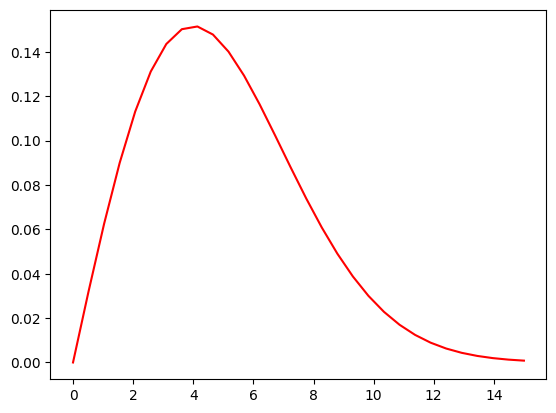

In [28]:
b = 4 # parameter för rayleigh fördelning
M = 2 # antal punkter per l.e

# ett visst antal utfall
x_obs = stats.rayleigh.rvs(scale= b, size=1000)
# Om ingen scale eller loc får vi fördelningen utan att den är delat med något eller adderad med något. 

medel = np.mean(x_obs)
print(f"Väntevärde: {medel}")
print(f"Förväntat b: {medel/(np.sqrt(np.pi/(2)))}")

t = np.linspace(0, 15, M*15) 
pdf = stats.rayleigh.pdf(t, scale=b) 
plt.plot(t, pdf, "red") 
plt.show()

In [38]:
mk_estimation = np.mean(x_obs)*np.sqrt(2/np.pi)
ml_estimation = np.sqrt(np.sum(x_obs**2)/(2*len(x_obs)))
print(f'MK: {mk_estimation}')
print(f'ML: {ml_estimation}')
# a och b
# bounds = [(-10,10), (-10,10)] 
# Vad vi antar att vår "scale" b är och vad vår "loc" som vi inte ändrat på är i för intervall
# Alltså är det en två dimensionell sökande efter maximumpunkt. Vi måste köra på båda
# max_likelihood_est = stats.fit(stats.rayleigh, x_obs, bounds=bounds, method="mle")
# least_square = stats.fit(stats.rayleigh, x_obs, bounds=bounds, method="mse")
# est_ml = max_likelihood_est.params.scale
# est_mk = least_square.params.scale

MK: 4.080749499192358
ML: 4.078588668228622



2. 
Givet att vi har tillräckligt många datapunkter kan vi anta att den beter sig som en normalfördelning pga centrala gränsvärdessatsen.
Genom att använda variabelsubstitution och gamma funktionen kan E[X] finnas till $E[X]=b\sqrt{\frac{\pi}{2}}$

3.Beskriv idén bakom linjär regression icg gyr nab ned hjälp av *tools.regress* kan skatta parametern i modellen $w_k=\log{y_k}=\beta_0+\beta_1 x_k +\varepsilon_k$. 
 Idén bakom linjär regression är att försöka finna hur två storheter beror av varandra. I detta fallet linjärt.
 * Detta görs genom att beskriva sambandet genom $y=\alpha + \beta x$

Vi kan skatta $y_k$ i vårt exempel genom att skatta $w_k$ först och sedan använda det för att få $y_k$

Tools.regress tar in två listor med X och y värden, alltså våra observerade värden. Här är det också tydligt att X är oberoende variabel, men y är den beroende. Från detta får vi $\beta_1$. För att därefter få $\beta_0$ kan man t.ex. använda $\overline{w}-\beta^* \overline{x}$

In [30]:
X= np.array([0,1,2])
y= np.array([3, 4.4, 4.6])
# Exempel att 
b_1 = tools.regress(X, y)[0]
b_0 = np.mean(y)- b_1*np.mean(X)
print(f"{np.round(b_1, 2)[0]}x+{np.round(b_0,2)[0]}")

2.72x+1.28


### 4. Labborationsuppgifter

#### Problem 1

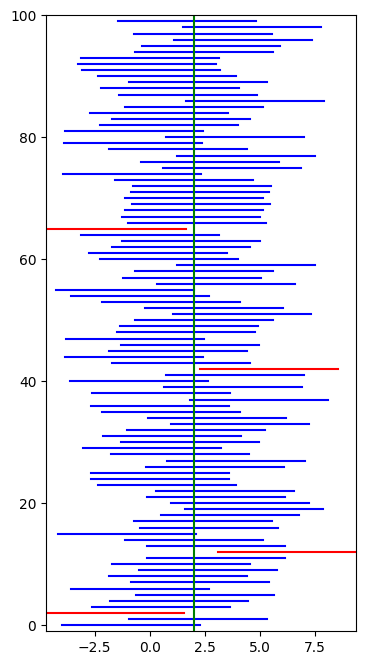

In [31]:
## Problem 1: Simulering av konfidensintervall
# Parametrar
# Antal mätningar
n = 25
# Väntevärdet
mu = 2
# Standardavvikelsen
sigma = 8
# Ett minus konfidensgraden
alpha = 0.05
# Antal intervall
m = 100
# Simulera n observationer för varje intervall.
x = stats.norm.rvs(loc=mu, scale=sigma, size=(m, n))
# Skatta mu med medelvärdet.
xbar = np.mean(x, axis=-1)
# Beräkna kvantilerna och standardavvikelsen för
# medelvärdet.
lambda_alpha_2 = stats.norm.ppf(1 - alpha / 2)
D = sigma / np.sqrt(n)
# Beräkna undre och övre gränserna.
undre = xbar - lambda_alpha_2 * D
övre = xbar + lambda_alpha_2 * D

## Problem 1: Simulering av konfidensintervall (forts.)
# Skapa en figur med storlek 4 Ö 8 tum.
plt.figure(figsize=(4, 8))
# Rita upp alla intervall
for k in range(m):
    # Rödmarkera alla intervall som missar mu.
    if övre[k] < mu or undre[k] > mu:
        color = 'r'
    else:
        color = 'b'
    plt.plot([undre[k], övre[k]], [k, k], color)
# Fixa till gränserna så att figuren ser lite bättre ut.
b_min = np.min(undre)
b_max = np.max(övre)
plt.axis([b_min, b_max, -1, m])
# Rita ut det sanna värdet.
plt.plot([mu, mu], [-1, m], 'g')
# Visa plotten.
plt.show()

#### Svar på frågor:
1. Hur många av dessa intervall kan förväntas innehålla det sanna värdet på μ?

Definitionen av konfidensgrad är hur ofta ett interval väljs där $\mu$ ligger i det. Alltså $100\cdot 0.95= 95$ st innehåller sanna värdet för $\mu$. 

2. Vad visar de horisontella och vertikala sträcken? 

Vi har gjort 100 st försök där vi sökt ett konfidensinterval. Vi ser nu dessa ritade ritade över varandra. Gröna linjen i mitten visar väntevärdet $\mu$. 

3. Hur många av de 100 intervallen innehåller det sanna värdet för $\mu$ Stämmer resultat med dina förväntningar?

5 st. Vilket var förväntat. 95 i intervall, 5 utanför.

### Problem 2
I denna uppgift ska vi undersöka två olika punktskattningar av värdet på
parametern i en Rayleighfördelning. Koden nedan genererar en samling Ray-
leighfördelade stokastiska variabler med parametervärde 4 och plottar sedan
skattningarna est_ml och est_mk. Använd dina två skattningar från förbe-
redelseuppgift 1

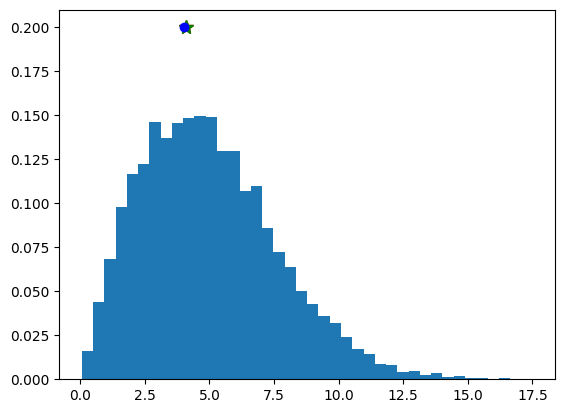

In [32]:
## Problem 2: Maximum likelihood, minsta kvadrat
M = 10000
b = 4
# Simulera M utfall med parameter b.
x = stats.rayleigh.rvs(scale=b, size=M)
# Skapa figur och plotta histogrammet.
plt.figure()
plt.hist(x, 40, density=True)
est_ml = ml_estimation# Skriv din ML-skattning här
est_mk = mk_estimation # Skriv din MK-skattning här
# Plotta de två skattningarna.
plt.plot(est_ml, 0.2, 'r*', markersize=10)
plt.plot(est_mk, 0.2, 'g*', markersize=10)
plt.plot(b, 0.2, 'bo')
plt.show()

Ser din skattning bra ut? Kontrollera hur täthetsfunktionen ser ut genom
att plotta den med din skattning:

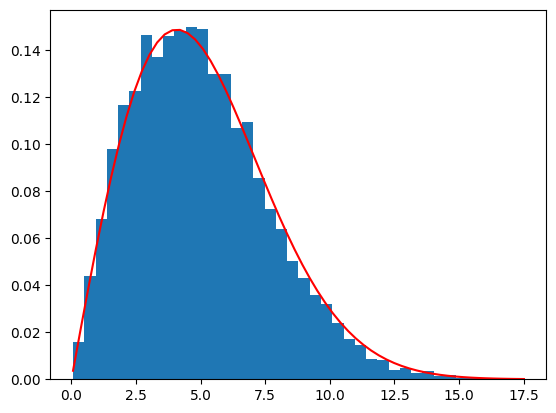

In [33]:
## Problem 2: Maximum likelihood, minsta kvadrat (forts.)
# Skapa figur.
plt.figure()
# Visa histogrammet.
plt.hist(x, 40, density=True)
# Plotta täthetsfunktionen för den skattade parametern.
x_grid = np.linspace(np.min(x), np.max(x), 60)
pdf = stats.rayleigh.pdf(x_grid, scale=est_ml)
plt.plot(x_grid, pdf, 'r')
plt.show()

### Problem 3
Vi ska nu undersöka en Rayleighfördelad signal, bestämma en punktskatt-
ning av parametervärdet samt ta fram ett konfidensintervall för parametern.
Ladda in data genom att skriva y = np.loadtxt('wave_data.dat'). Filen
innehåller en signal som du kan plotta genom att skriva följande kod

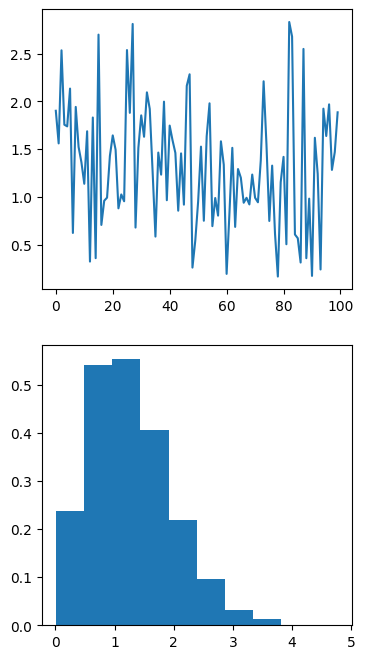

In [34]:
# Ladda data.
y = np.loadtxt('data/wave_data.dat')
# Plotta en bit av signalen samt histogrammet.
plt.figure(figsize=(4, 8))
plt.subplot(2, 1, 1)
plt.plot(y[:100])
plt.subplot(2, 1, 2)
plt.hist(y, density=True)
plt.show()

In [ ]:
#* Eget stycke
# Estimering
est_ml_b = np.sqrt(np.sum(y**2)/(2*len(y)))
alpha_2 = 0.05
const_2pi = np.sqrt(2/np.pi)

ml_estimation_2 = np.mean(y)* const_2pi

lambda_alpha = stats.norm.ppf(1 - alpha_2)

s= np.sqrt(sum((y-np.mean(y))**2)/(len(y)-1))

diff = lambda_alpha*s*const_2pi/np.sqrt(len(y))
diff2 = lambda_alpha*ml_estimation_2* np.sqrt((4-np.pi)/(np.pi*len(y)))
lower_bound = ml_estimation_2*const_2pi - diff
upper_bound = ml_estimation_2*const_2pi + diff

print(f"Est b: {est_ml_b}")
print(f"Interval: {lower_bound} - {upper_bound}")
print(f'Stnd.Avv. {s}')
print(f'Estimering: {est_ml_b}')

1.0204674492113197
1.0141417528872556
Est b: 1.0204674492113197
Interval: 0.8001973479763709 - 0.8181387462122212
Stnd.Avv. 0.683532190456175
Estimering: 1.0204674492113197


In [49]:
#* Eget stycke
# Måste nog ta bort och byta typ allt eftersom det är förmodligen för b vi ska fixa intervallet. Då måste jag använda matematiskt med b^* antar jag.
freedom_units = len(y)-1
loc = np.mean(y)
s = np.sqrt(np.sum((y-loc)**2 )/(freedom_units))
interval = stats.t.interval(confidence=0.95, df=freedom_units, loc=loc, scale=s/np.sqrt(len(y)))
# Beräkna andel
print(np.sum((y < interval[1])*(interval[0]<y))/10000)
# Vilket är drygt 95% Dock lite avvikelse vilket är skumt
print(f"vänte: {loc}")
print(f"stnd.avv: {s}")
print(f"Interval: {lower_bound} till {upper_bound}")

0.0153
vänte: 1.27103819613552
stnd.avv: 0.6835321904561753
Interval: 0.8001973479763709 till 0.8181387462122212


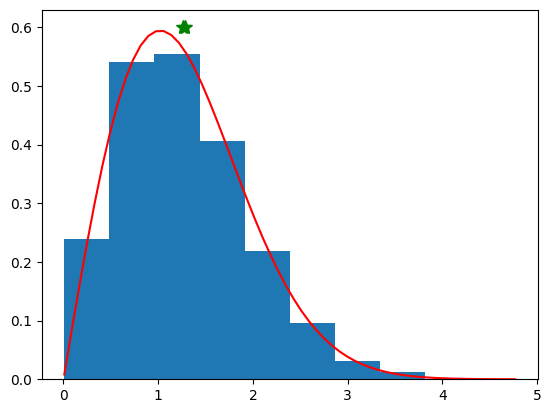

In [51]:
## Problem 3: Konfidensintervall (forts.)
# Plotta histogrammet och skattningen.
plt.figure()
plt.hist(y, density=True)
plt.plot(interval[0], 0.6, 'g*', markersize=10)
plt.plot(interval[1], 0.6, 'g*', markersize=10)
# Plotta täthetsfunktionen med den skattade parametern.
x_grid = np.linspace(np.min(y), np.max(y), 60)
pdf = stats.rayleigh.pdf(x_grid, scale=est_ml_b)
plt.plot(x_grid, pdf, 'r')
plt.show()

Ja fördelningen passar bra och även intervalgränserna

### Problem 4
I denna uppgift undersöker vi en datamängd visuellt med hjälp av Python
för att se om vi kan göra några intressanta iakttagelser. Filen birth.dat
innehåller data om 747 förstföderskor i Malmö under åren 1991-1993. En
beskrivning av data finns i filen birth.txt. Filen innehåller olika 26 variab-
ler, varav några är numeriska (såsom längd och vikt hos modern) och andra
kategoriska, dvs. antar ett av 2-3 fixa värden (exempelvis 1 om barnet var
planerat och 2 om det inte var planerat). Använd informationen i birth.txt
och funktionen plt.hist för att generera en figur med fyra olika histogram
som visar fördningarna för barnets födelsevikt, moderns ålder, moderns längd
respektive moderns vikt.


Det är av medicinskt intresse att bestämma riskfaktorer som ökar san-
nolikheten för att ett barn föds med alltför låg födelsevikt. Låg födelsevikt
definieras som en födelsevikt under 2500 g, mycket låg födelsevikt som en fö-
delsevikt under 1500 g och extremt låg födelsevikt som en födelsevikt under
1000 g. Vi kan användra den givna datamängden för att försöka dra slutsat-
ser om riskfaktorer för låg födelsevikt genom att jämföra viktfördelningen för barn vars mödrar har en viss riskfaktor med viktfördelning för barn vars
mödrar saknar riskfaktorn.


En känd riskfaktor för låg födelsevikt hos nyfödda är rökning. Vi undersö-
ker därför skillnaden i födelsevikt mellan barn vars mödrar röker respektive
inte röker under graviditeten. I filen birth.txt ser man att kolonn 20 i
birth.dat innehåller rökvanor och att värdena 1 och 2 betyder att modern
inte röker under graviditeten, medan värdet 3 betyder att hon gör det. Skapa
två variabler x och y för födelsevikter hörande till icke-rökande respektive
rökande mödrar enligt:

In [ ]:
## Problem 4: Fördelningar av givna data
# Ladda datafilen.
birth = np.loadtxt('data/birth.dat')
# Definiera filter beroende på om modern röker (kolonn 20
# är 3) eller inte (kolonn 20 är 1 eller 2). Notera att
# eftersom indexering i Python börjar med noll så betecknas
# kolonn 20 med indexet 19.
non_smokers = (birth[:, 19] < 3)
smokers = (birth[:, 19] == 3)
# Extrahera födelsevikten (kolonn 3) för de två kategorierna.
x = birth[non_smokers, 2]
y = birth[smokers, 2]

Vad som händer här är att birth[:, 19] < 3 returnerar en vektor av True
och False och att bara de rader av kolonn 3 (födelsevikterna) i birth för
vilka jämförelsen är sann, väljs ut. Använd funktionen np.shape eller kom-
mandot %whos för att se storleken på vektorerna x och y.


Ett alternativ till histogram för att visualisera en datamängd är kärne-
stimatorer. Dessa interpolerar en täthetsfunktion för datat genom att "släta ut" det med hjälp av en viss kärnfunktion. Koden nedan använder sådana
kärnestimatorer för att visualisera datat ovan.

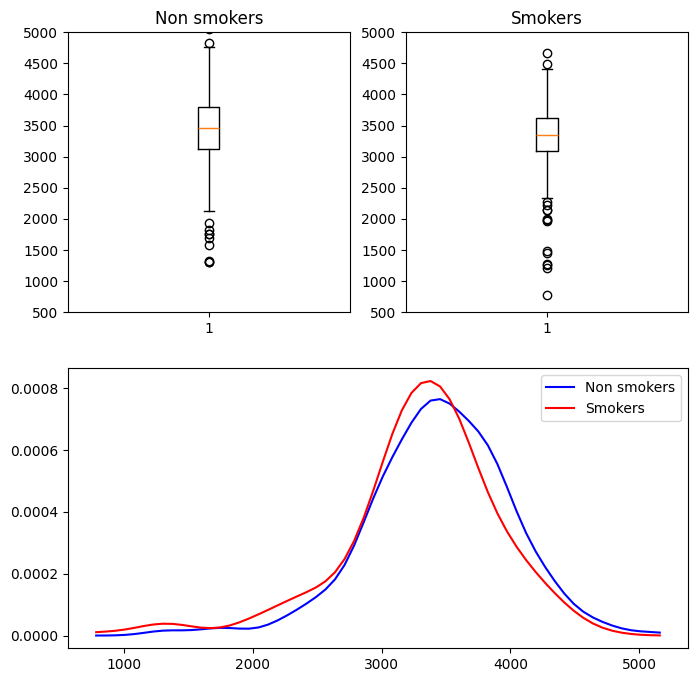

In [65]:
## Problem 4: Fördelningar av givna data (forts.)
def view_comparison_plot(x, y, x_name: str, y_name:str):
    # Skapa en stor figur.
    plt.figure(figsize=(8, 8))
    # Plotta ett låddiagram över x.
    plt.subplot(2, 2, 1)
    plt.title("Non smokers")
    plt.boxplot(x)
    plt.axis([0, 2, 500, 5000])

    # Plotta ett låddiagram över y.
    plt.subplot(2, 2, 2)
    plt.title("Smokers")
    plt.boxplot(y)
    plt.axis([0, 2, 500, 5000])
    # Beräkna kärnestimator för x och y. Funktionen
    # gaussian_kde returnerar ett funktionsobjekt som sedan
    # kan evalueras i godtyckliga punkter.
    kde_x = stats.gaussian_kde(x) # PDF estimering
    kde_y = stats.gaussian_kde(y)
    # Skapa ett rutnät för vikterna som vi kan använda för att
    # beräkna kärnestimatorernas värden.
    min_val = np.min(birth[:, 2])
    max_val = np.max(birth[:, 2])
    grid = np.linspace(min_val, max_val, 60)
    # Plotta kärnestimatorerna.
    plt.subplot(2, 2, (3, 4))
    plt.plot(grid, kde_x(grid), 'b', label="Non smokers")
    plt.plot(grid, kde_y(grid), 'r', label = "Smokers")
    plt.legend()
    plt.show()

view_comparison_plot(x,y, "", "")

**Svar på frågorna**
Vad betyder plottarna? Vilka slutsatser kan du dra om rökande mödrars påverkan på barns födelsevikt?
Vi ser att båda plottarna ser ut att vara normaldistibuerade. Från boxplottsen kan vi även se att medelvärdet för båda fördelningarna. 

Vi ser att för rökaran är medelvikten är mindre och även standardavvikelsen. 
